In [297]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from smooth import smoothen
from sklearn import preprocessing


%matplotlib inline

In [298]:
filelist = ["calcium_data/140708B_140811a_result", 
            "calcium_data/140909C_141112a_result", 
            "calcium_data/141006C_141121a_result",
            "calcium_data/150109A_150302a_result", 
            "calcium_data/151122A_160202a_result", 
            "calcium_data/151122B_160207a_result", 
            "calcium_data/160209A_160430a_result", 
            "calcium_data/160209B_160428a_result"]

In [299]:
f = h5py.File(filelist[2]+'.hdf5', 'r')
data = f['data']
stims = np.unique(f['meta'][:,1])
d = smoothen(filelist[2])

In [300]:
m = np.mean(f['data'][:,s,:], axis=0)

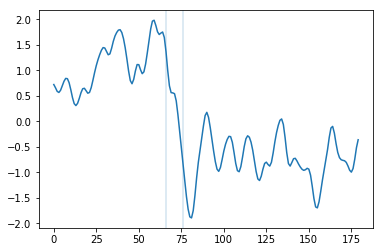

In [326]:
test = preprocessing.scale(d[60,23,:])

bad=True
for i in range(170):
    if not bad:
        break
    if np.absolute(test[i+10]-test[i]) >= 2:
        for j in range(30):
            if np.absolute(test[i+10+j]-test[i]) < 2:
                b=True
                break
            else:
                 b=False
            if b:
                continue
        bad=False
plt.axvline(i, alpha=0.2)
plt.axvline(i+10, alpha=0.2)
    
plt.plot(test)

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


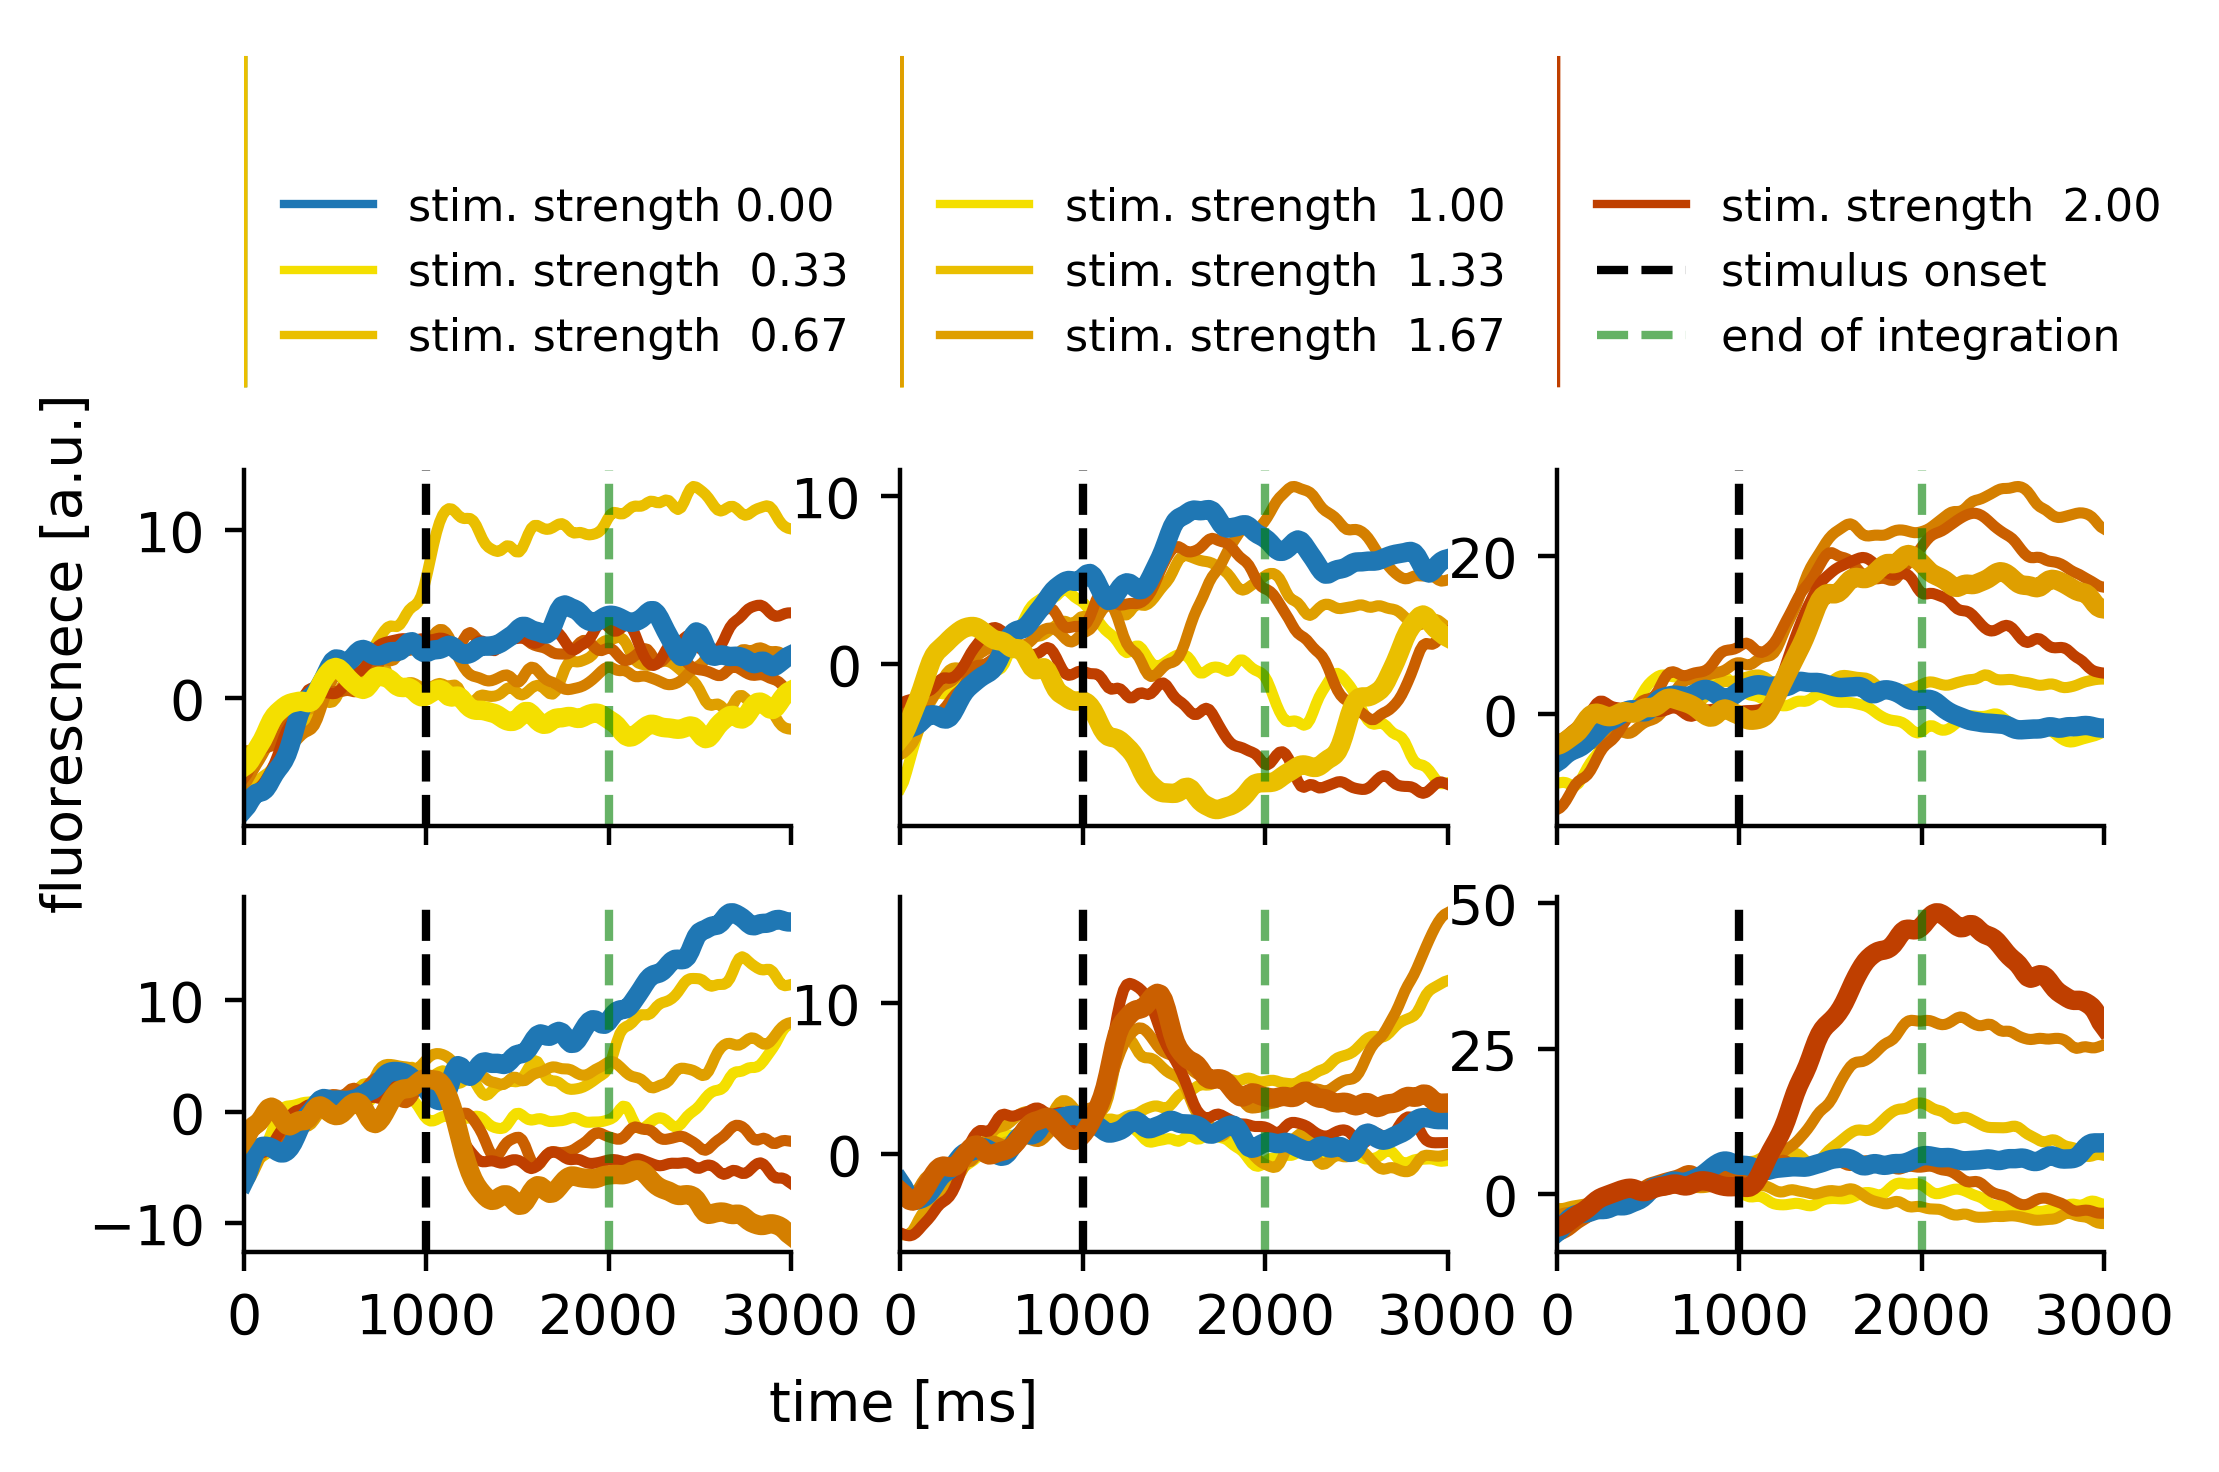

In [361]:
colors = ['#BF3F00', '#CA5F00', '#D47F00', '#DF9F00', '#EABF00', '#F4DF00', '#FFFF00'][::-1]
dends = [ 17.,  11.,  57.,  23.,  47.,  97.]

fig, ((axa, axb, axc), (ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(3,3, sharex=True, dpi=400)
axarr = (ax1, ax2, ax3, ax4, ax5, ax6)

for k, ax in enumerate(axarr):
    s = dends[k]
    
    baseline = np.mean(data[:,:,:58], axis=2).reshape(data.shape[0], data[:,:,:].shape[1])

    trials_mask_2 = f['meta'][:, 1] == 0
    ax.plot(np.linspace(0,3000,180), np.mean(d[trials_mask_2, s, :]-np.tile(baseline[trials_mask_2, s], (180, 1)).T, axis=0), linewidth=3.5)
    for i in range(1,7):
        trials_mask_1 = f['meta'][:, 1] == stims[i]

        #plt.plot(m)
        #plt.plot(np.mean(d[:,59,:], axis=0))
        if i == k+1:
            z=2
            lw = 3.5
        else: 
            lw = 2
            z=1
        ax.plot(np.linspace(0,3000,180), np.mean(d[trials_mask_1, s, :]-np.tile(baseline[trials_mask_1, s], (180, 1)).T, axis=0), color=colors[i], linewidth=lw, zorder=z)
    ax.axvline(1000, linestyle='--', color='black')
    ax.axvline(2000, linestyle='--', color='green', alpha=0.6)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

axa.plot([-5,-4], [1,2], label='stim. strength 0.00')
for k, stim in enumerate(stims[1:3]):
    axa.plot([-5,-4], [1,2], color=colors[k+1], label='stim. strength {0: .2f}'.format(stim))
axa.set_xlim(0,3000)
axa.legend(frameon=False, loc='lower left', fontsize=8)

for k, stim in enumerate(stims[3:6]):
    axb.plot([-5,-4], [1,2], color=colors[k+1], label='stim. strength {0: .2f}'.format(stim))
axb.set_xlim(0,3000)
axb.legend(frameon=False, loc='lower left', fontsize=8)

axc.plot([-5,-4], [1,2], color=colors[-1], label='stim. strength {0: .2f}'.format(stims[-1]))
axc.axvline(-500, linestyle='--', color='black', label='stimulus onset')
axc.axvline(-500, linestyle='--', color='green', alpha=0.6, label='end of integration')
axc.legend(frameon=False, loc='lower left', fontsize=8)


#axa.spines['top'].set_visible(False)
#axa.spines['right'].set_visible(False)
#axa.spines['top'].set_visible(False)
#axa.spines['right'].set_visible(False)
axa.set_axis_off()
axb.set_axis_off()
axc.set_axis_off()

fig.text(0.4, 0.02, 'time [ms]', ha='center')
fig.text(0.04, 0.5, 'fluorescnece [a.u.]', va='center', rotation='vertical')

fig.savefig('tuning_ca2+.png')

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


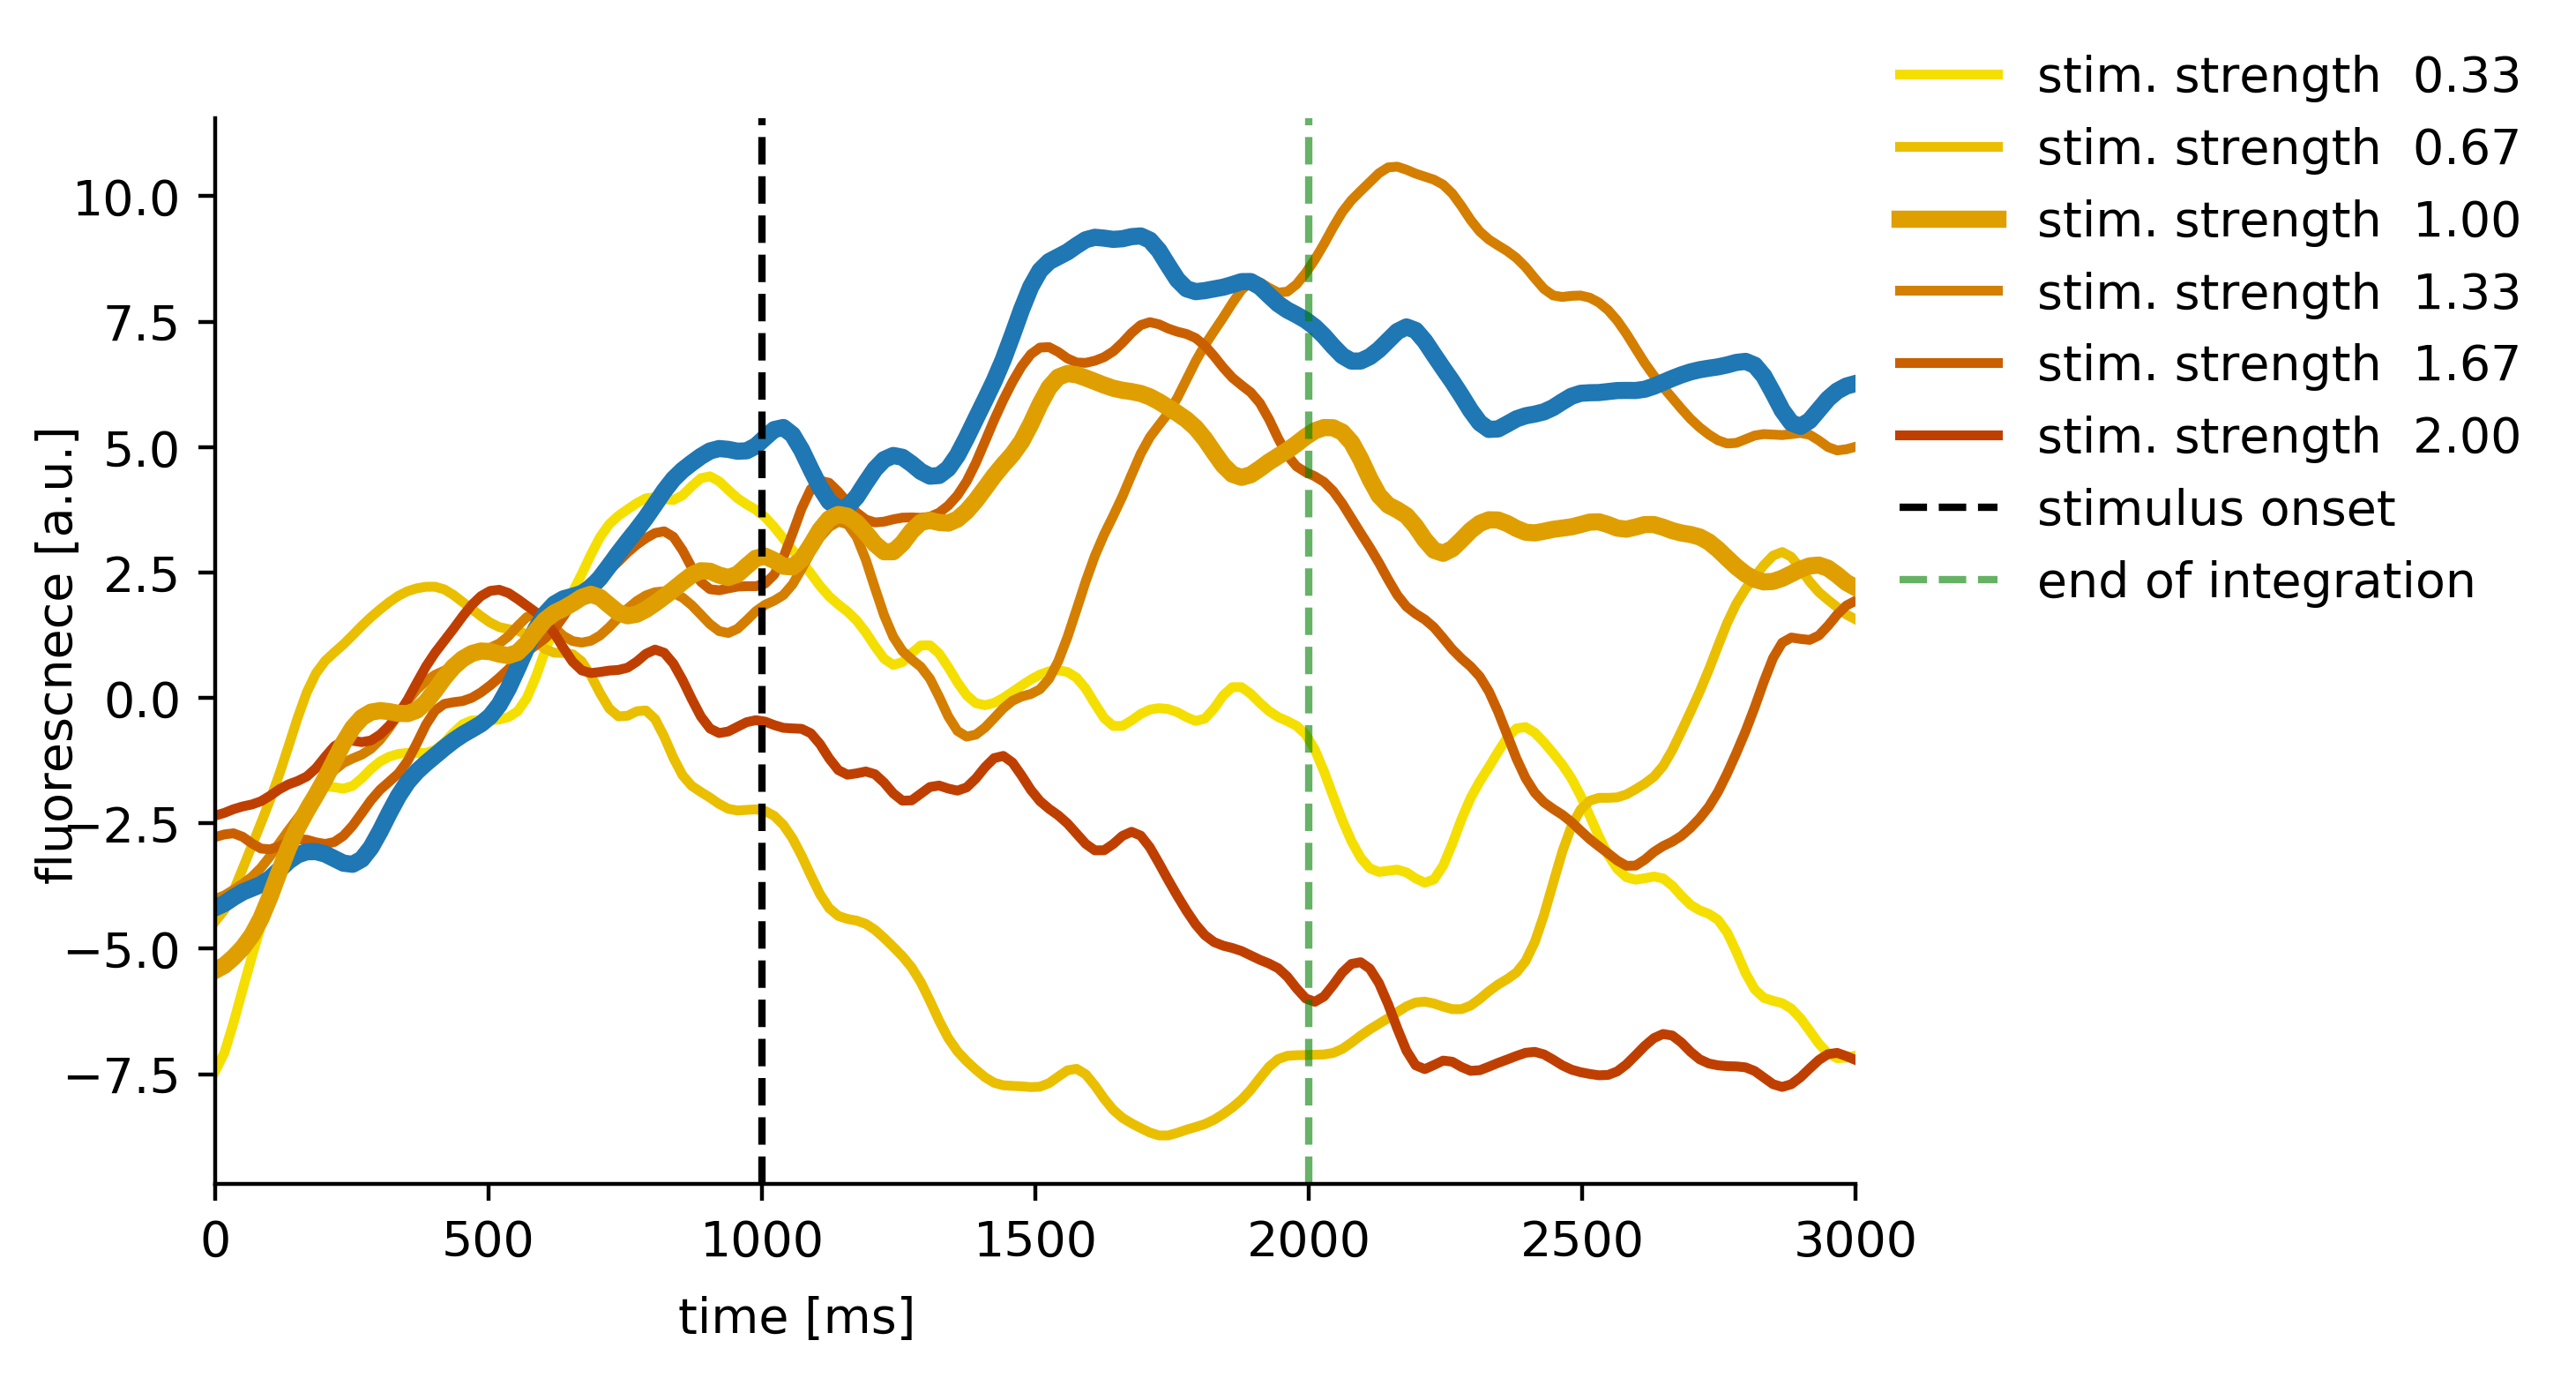

In [359]:
colors = ['#BF3F00', '#CA5F00', '#D47F00', '#DF9F00', '#EABF00', '#F4DF00', '#FFFF00'][::-1]
dends = [ 17.,  11.,  57.,  23.,  47.,  97.]

fig, ax = plt.subplots(1,1, dpi=400)


s = dends[1]

baseline = np.mean(data[:,:,:58], axis=2).reshape(data.shape[0], data[:,:,:].shape[1])

trials_mask_2 = f['meta'][:, 1] == 0
ax.plot(np.linspace(0,3000,180), np.mean(d[trials_mask_2, s, :]-np.tile(baseline[trials_mask_2, s], (180, 1)).T, axis=0), linewidth=3.5)
for i in range(1,7):
    trials_mask_1 = f['meta'][:, 1] == stims[i]

    #plt.plot(m)
    #plt.plot(np.mean(d[:,59,:], axis=0))
    if i == k+1:
        z=2
        lw = 3.5
    else: 
        lw = 2
        z=1
    ax.plot(np.linspace(0,3000,180), np.mean(d[trials_mask_1, s, :]-np.tile(baseline[trials_mask_1, s], (180, 1)).T, axis=0), color=colors[i], linewidth=lw, zorder=z, label='stim. strength {0: .2f}'.format(stims[i]))
ax.axvline(1000, linestyle='--', color='black', label='stimulus onset')
ax.axvline(2000, linestyle='--', color='green', alpha=0.6, label='end of integration')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.legend(frameon=False, loc='lower left', bbox_to_anchor=(1, 0.5))

ax.set_xlim(0,3000)

#axa.plot([-5,-4], [1,2], label='stim. strength 0.00')
#for k, stim in enumerate(stims[1:3]):
#    axa.plot([-5,-4], [1,2], color=colors[k+1], label='stim. strength {0: .2f}'.format(stim))
#axa.set_xlim(0,3000)
#axa.legend(frameon=False, loc='lower left', fontsize=8)

#for k, stim in enumerate(stims[3:6]):
#    axb.plot([-5,-4], [1,2], color=colors[k+1], label='stim. strength {0: .2f}'.format(stim))
#axb.set_xlim(0,3000)
#axb.legend(frameon=False, loc='lower left', fontsize=8)

#axc.axvline(-500, linestyle='--', color='black', label='stimulus onset')
#axc.axvline(-500, linestyle='--', color='green', alpha=0.6, label='end of integration')
#axc.legend(frameon=False, loc='lower left', fontsize=8)
axa.set_axis_off()
axb.set_axis_off()
axc.set_axis_off()

fig.text(0.4, 0.02, 'time [ms]', ha='center')
fig.text(0.04, 0.5, 'fluorescnece [a.u.]', va='center', rotation='vertical')

fig.savefig('tuning_ca2+_single.png')

In [161]:
f = h5py.File(filelist[1]+'.hdf5', 'r')
data = f['data']
stims = np.unique(f['meta'][:,1])
d = smoothen(filelist[1])

In [162]:
m = np.mean(f['data'][:,s,:], axis=0)

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


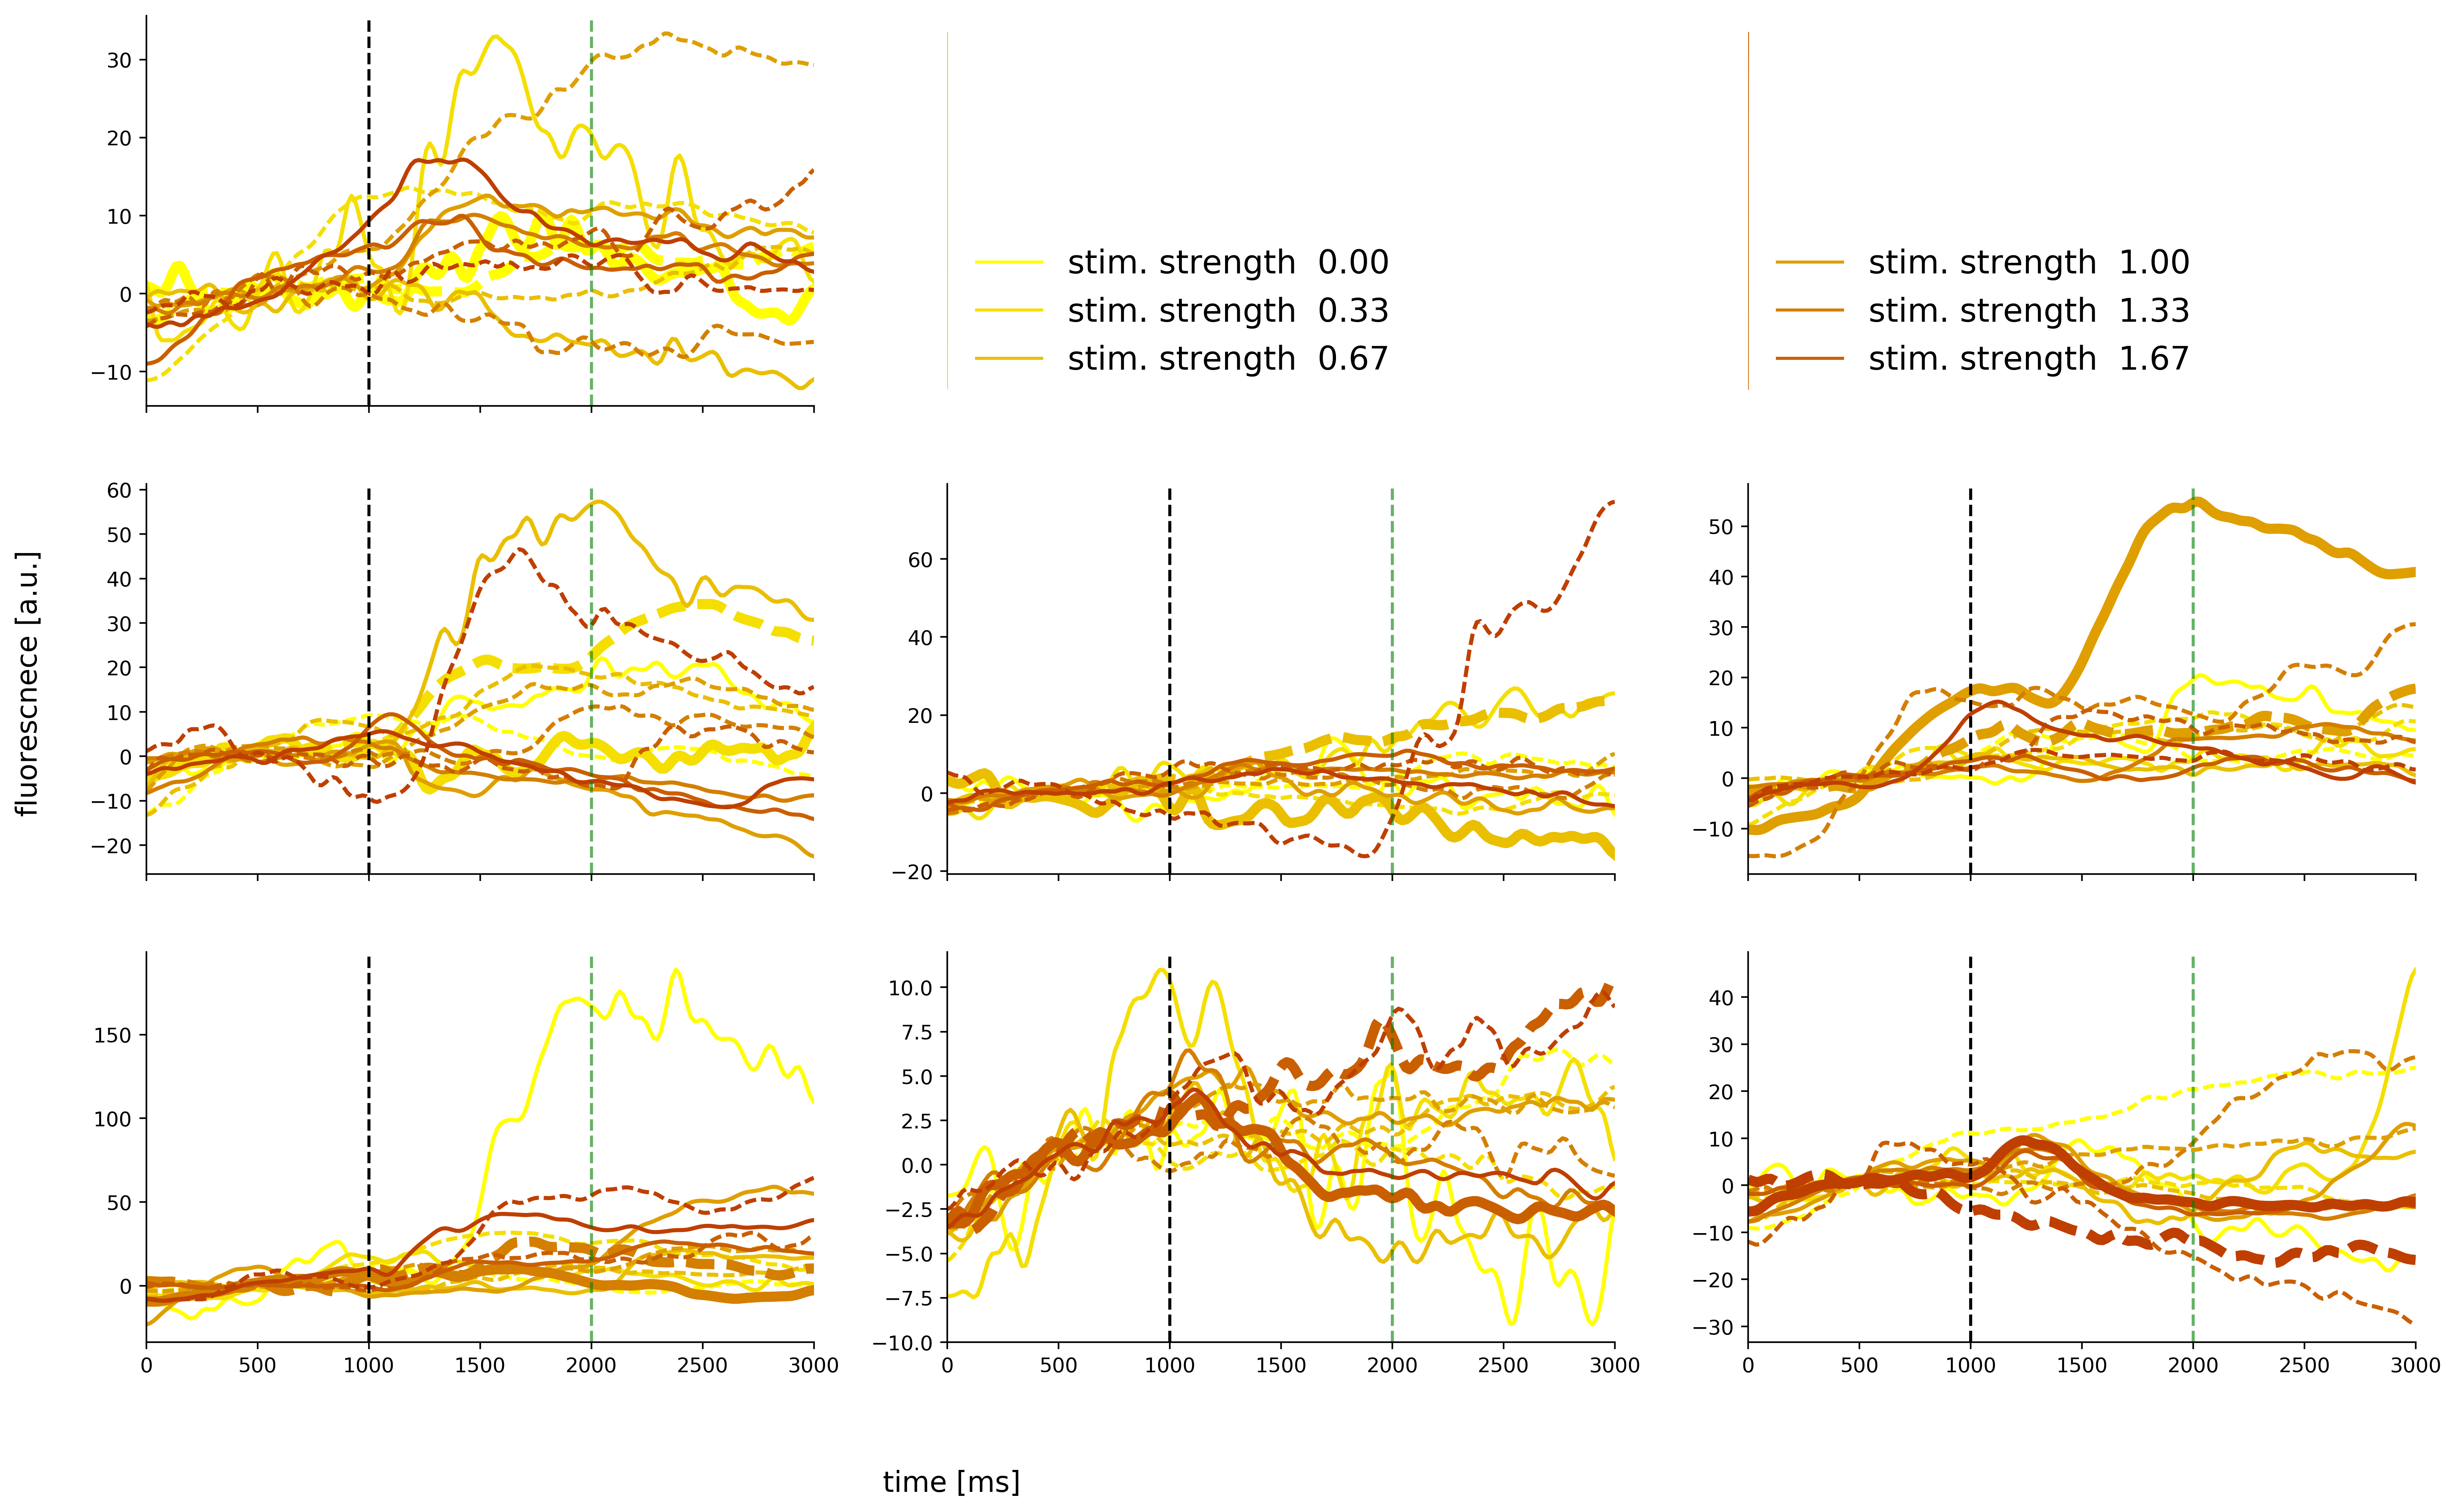

In [192]:
colors = ['#BF3F00', '#CA5F00', '#D47F00', '#DF9F00', '#EABF00', '#F4DF00', '#FFFF00'][::-1]
dends = [ 55., 36.,  50.,  88.,  40.,   7.,  28.]

fig, ((ax0, axb, axc), (ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(3,3, sharex=True, figsize=(20, 12), dpi=400)
axarr = (ax0, ax1, ax2, ax3, ax4, ax5, ax6)

for k, ax in enumerate(axarr):
    s = dends[k]
    
    baseline = np.mean(data[:,:,:58], axis=2).reshape(data.shape[0], data[:,:,:].shape[1])
    
    for i in range(7):
        trials_mask_1 = f['meta'][:, 1] == stims[i]
        trials_mask_2 = f['meta'][:, 2] == 1
        trials_mask_3 = f['meta'][:, 2] == 0
        
        hit_mask = np.logical_and(trials_mask_1, trials_mask_2)
        miss_mask = np.logical_and(trials_mask_1, trials_mask_3)

        

        #plt.plot(m)
        #plt.plot(np.mean(d[:,59,:], axis=0))
        if i == k:
            lw = 5
        else: lw = 2
        ax.plot(np.linspace(0,3000,180), np.mean(d[hit_mask, s, :]-np.tile(baseline[hit_mask, s], (180, 1)).T, axis=0), color=colors[i], linewidth=lw)
        ax.plot(np.linspace(0,3000,180), np.mean(d[miss_mask, s, :]-np.tile(baseline[miss_mask, s], (180, 1)).T, axis=0), color=colors[i], linestyle='--', linewidth=lw)
    ax.axvline(1000, linestyle='--', color='black')
    ax.axvline(2000, linestyle='--', color='green', alpha=0.6)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

for k, stim in enumerate(stims[:3]):
    axb.plot([-5,-4], [1,2], color=colors[k], label='stim. strength {0: .2f}'.format(stim))
axb.set_xlim(0,3000)
axb.legend(fontsize=16, frameon=False, loc='lower left')

for k, stim in enumerate(stims[3:6]):
    axc.plot([-5,-4], [1,2], color=colors[k+3], label='stim. strength {0: .2f}'.format(stim))
axc.set_xlim(0,3000)
axc.legend(fontsize=16, frameon=False, loc='lower left')

#axa.spines['top'].set_visible(False)
#axa.spines['right'].set_visible(False)
#axa.spines['top'].set_visible(False)
#axa.spines['right'].set_visible(False)
axa.set_axis_off()
axb.set_axis_off()
axc.set_axis_off()

fig.text(0.4, 0.04, 'time [ms]', ha='center', fontsize=14)
fig.text(0.08, 0.5, 'fluorescnece [a.u.]', va='center', rotation='vertical', fontsize=14)

fig.savefig('tuning_ca2+.png')

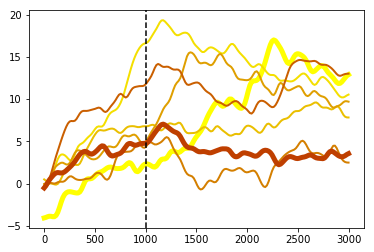

In [193]:
s = 5
p = 6

colors = ['#BF3F00', '#CA5F00', '#D47F00', '#DF9F00', '#EABF00', '#F4DF00', '#FFFF00'][::-1]

trials_mask_2 = f['meta'][:, 1] == 0
plt.plot(np.linspace(0,3000,180), np.mean(d[trials_mask_2, s, :]-np.tile(baseline[trials_mask_2, s], (180, 1)).T, axis=0), linewidth=5, color=colors[0])
for i in range(1,7):
    trials_mask_1 = f['meta'][:, 1] == stims[i]

    baseline = np.mean(data[:,:,:s], axis=2).reshape(data.shape[0], data[:,:,:].shape[1])

    #plt.plot(m)
    #plt.plot(np.mean(d[:,59,:], axis=0))
    if i == p:
        lw = 5
    else: lw = 2
    plt.plot(np.linspace(0,3000,180), np.mean(d[trials_mask_1, s, :]-np.tile(baseline[trials_mask_1, s], (180, 1)).T, axis=0), color=colors[i], linewidth=lw)
plt.axvline(1000, linestyle='--', color='black')

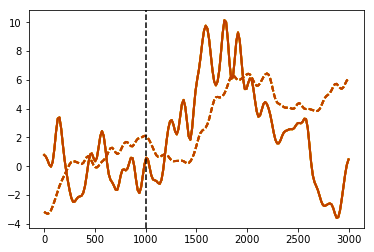

In [196]:
s = 55
p = 0

colors = ['#BF3F00', '#CA5F00', '#D47F00', '#DF9F00', '#EABF00', '#F4DF00', '#FFFF00'][::-1]

trials_mask_1 = f['meta'][:, 1] == stims[p]
trials_mask_2 = f['meta'][:, 2] == 1
trials_mask_3 = f['meta'][:, 2] == 0
        
hit_mask = np.logical_and(trials_mask_1, trials_mask_2)
miss_mask = np.logical_and(trials_mask_1, trials_mask_3)

trials_mask_2 = f['meta'][:, 1] == 0
for i in range(1,7):
    trials_mask_1 = f['meta'][:, 1] == stims[i]

    baseline = np.mean(data[:,:,:s], axis=2).reshape(data.shape[0], data[:,:,:].shape[1])

    #plt.plot(m)
    #plt.plot(np.mean(d[:,59,:], axis=0))
    if i == p:
        lw = 5
    else: lw = 2
    plt.plot(np.linspace(0,3000,180), np.mean(d[hit_mask, s, :]-np.tile(baseline[hit_mask, s], (180, 1)).T, axis=0), linewidth=lw, color=colors[i])
    plt.plot(np.linspace(0,3000,180), np.mean(d[miss_mask, s, :]-np.tile(baseline[miss_mask, s], (180, 1)).T, axis=0), color=colors[i], linewidth=lw, linestyle='--')
plt.axvline(1000, linestyle='--', color='black')

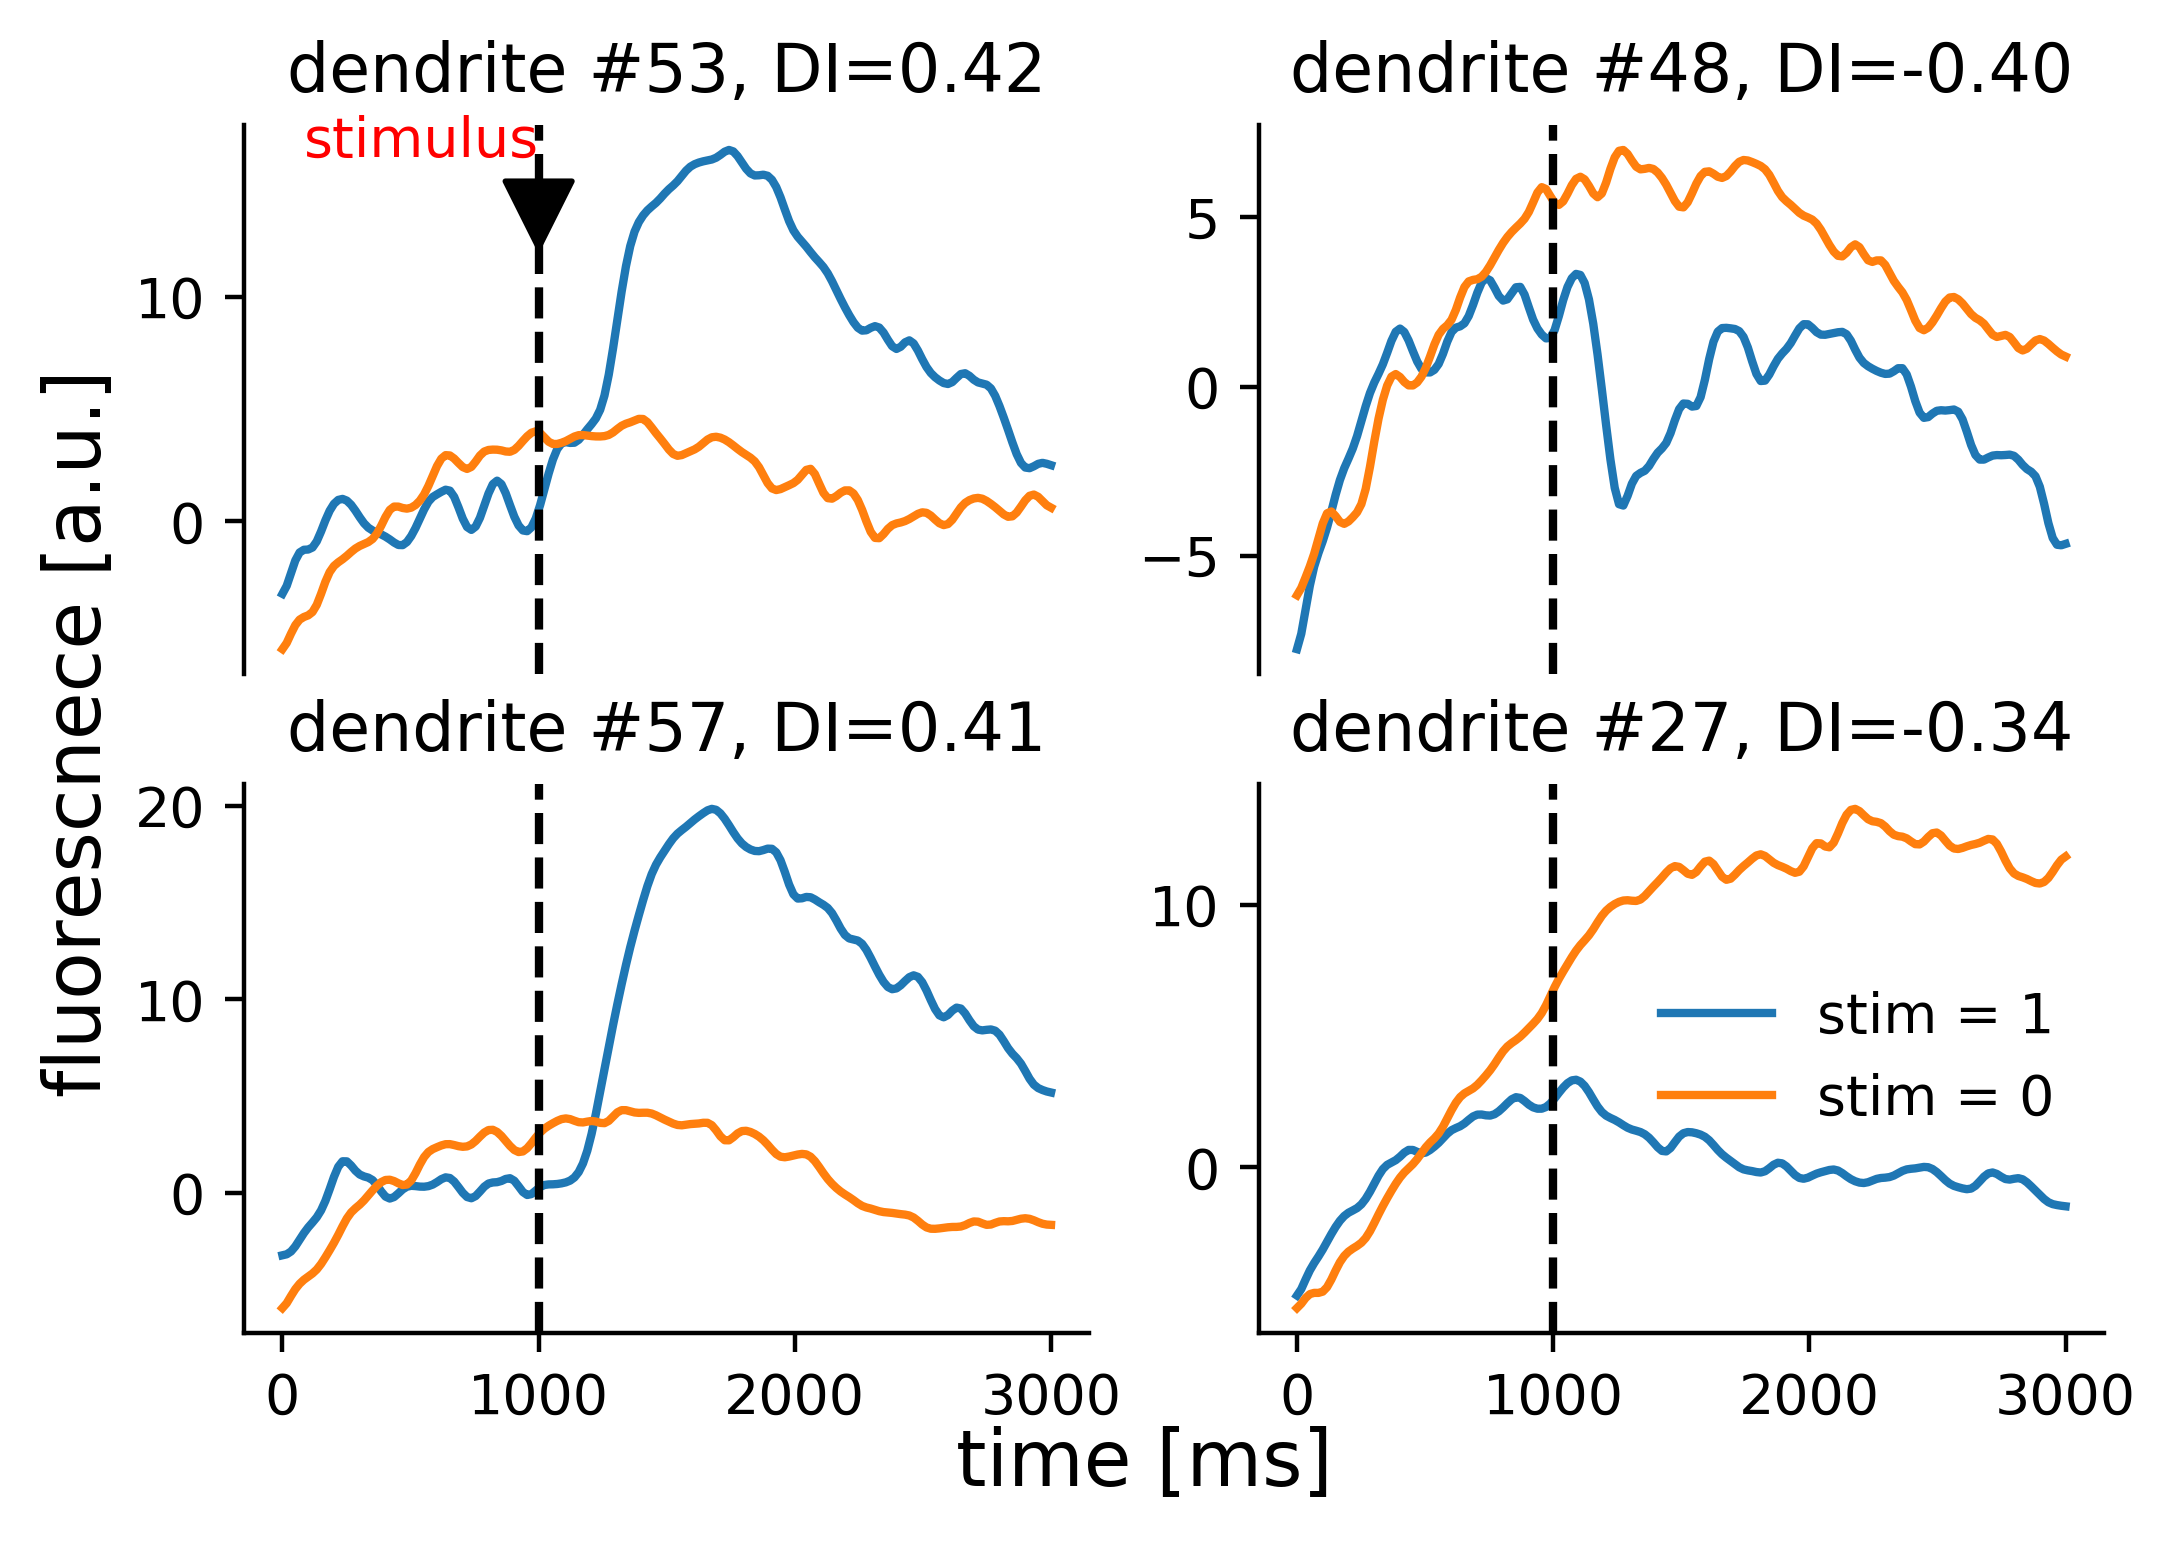

In [338]:
maxinds = [53, 57]
mininds = [48, 27]
inds = [53, 48, 57, 27]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, dpi=400)
axarr = ax1, ax2, ax3, ax4
for k, ax in enumerate(axarr):
    s = inds[k]
    ax.plot(np.linspace(0,3000, 180), np.mean(d[trials_mask_1, s, :]-np.tile(baseline[trials_mask_1, s], (180, 1)).T, axis=0), label='stim = 1')
    ax.plot(np.linspace(0,3000, 180), np.mean(d[trials_mask_2, s, :]-np.tile(baseline[trials_mask_2, s], (180, 1)).T, axis=0), label='stim = 0')
    
    ax.axvline(1000, linestyle='--', color='black')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
ax4.legend(frameon=False, loc='center right')

ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax1.xaxis.set_ticks_position('none') 
ax2.xaxis.set_ticks_position('none')

ax1.annotate('stimulus',
            xy=(1000, 12), xycoords='data',
            xytext=(0, 15), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom', color="r")

#ax2.annotate('stimulus',
#            xy=(1000, 6), xycoords='data',
#            xytext=(0, 15), textcoords='offset points',
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            horizontalalignment='right', verticalalignment='bottom', color="r")

ax1.set_title('dendrite #53, DI=0.42')
ax3.set_title('dendrite #57, DI=0.41')
ax2.set_title('dendrite #48, DI=-0.40')
ax4.set_title('dendrite #27, DI=-0.34')

fig.text(0.5, 0.03, 'time [ms]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'fluorescnece [a.u.]', va='center', rotation='vertical', fontsize=14)

#plt.tight_layout()
fig.savefig('on_vs_off.png')

In [190]:
for ax in axarr:
    print(ax)

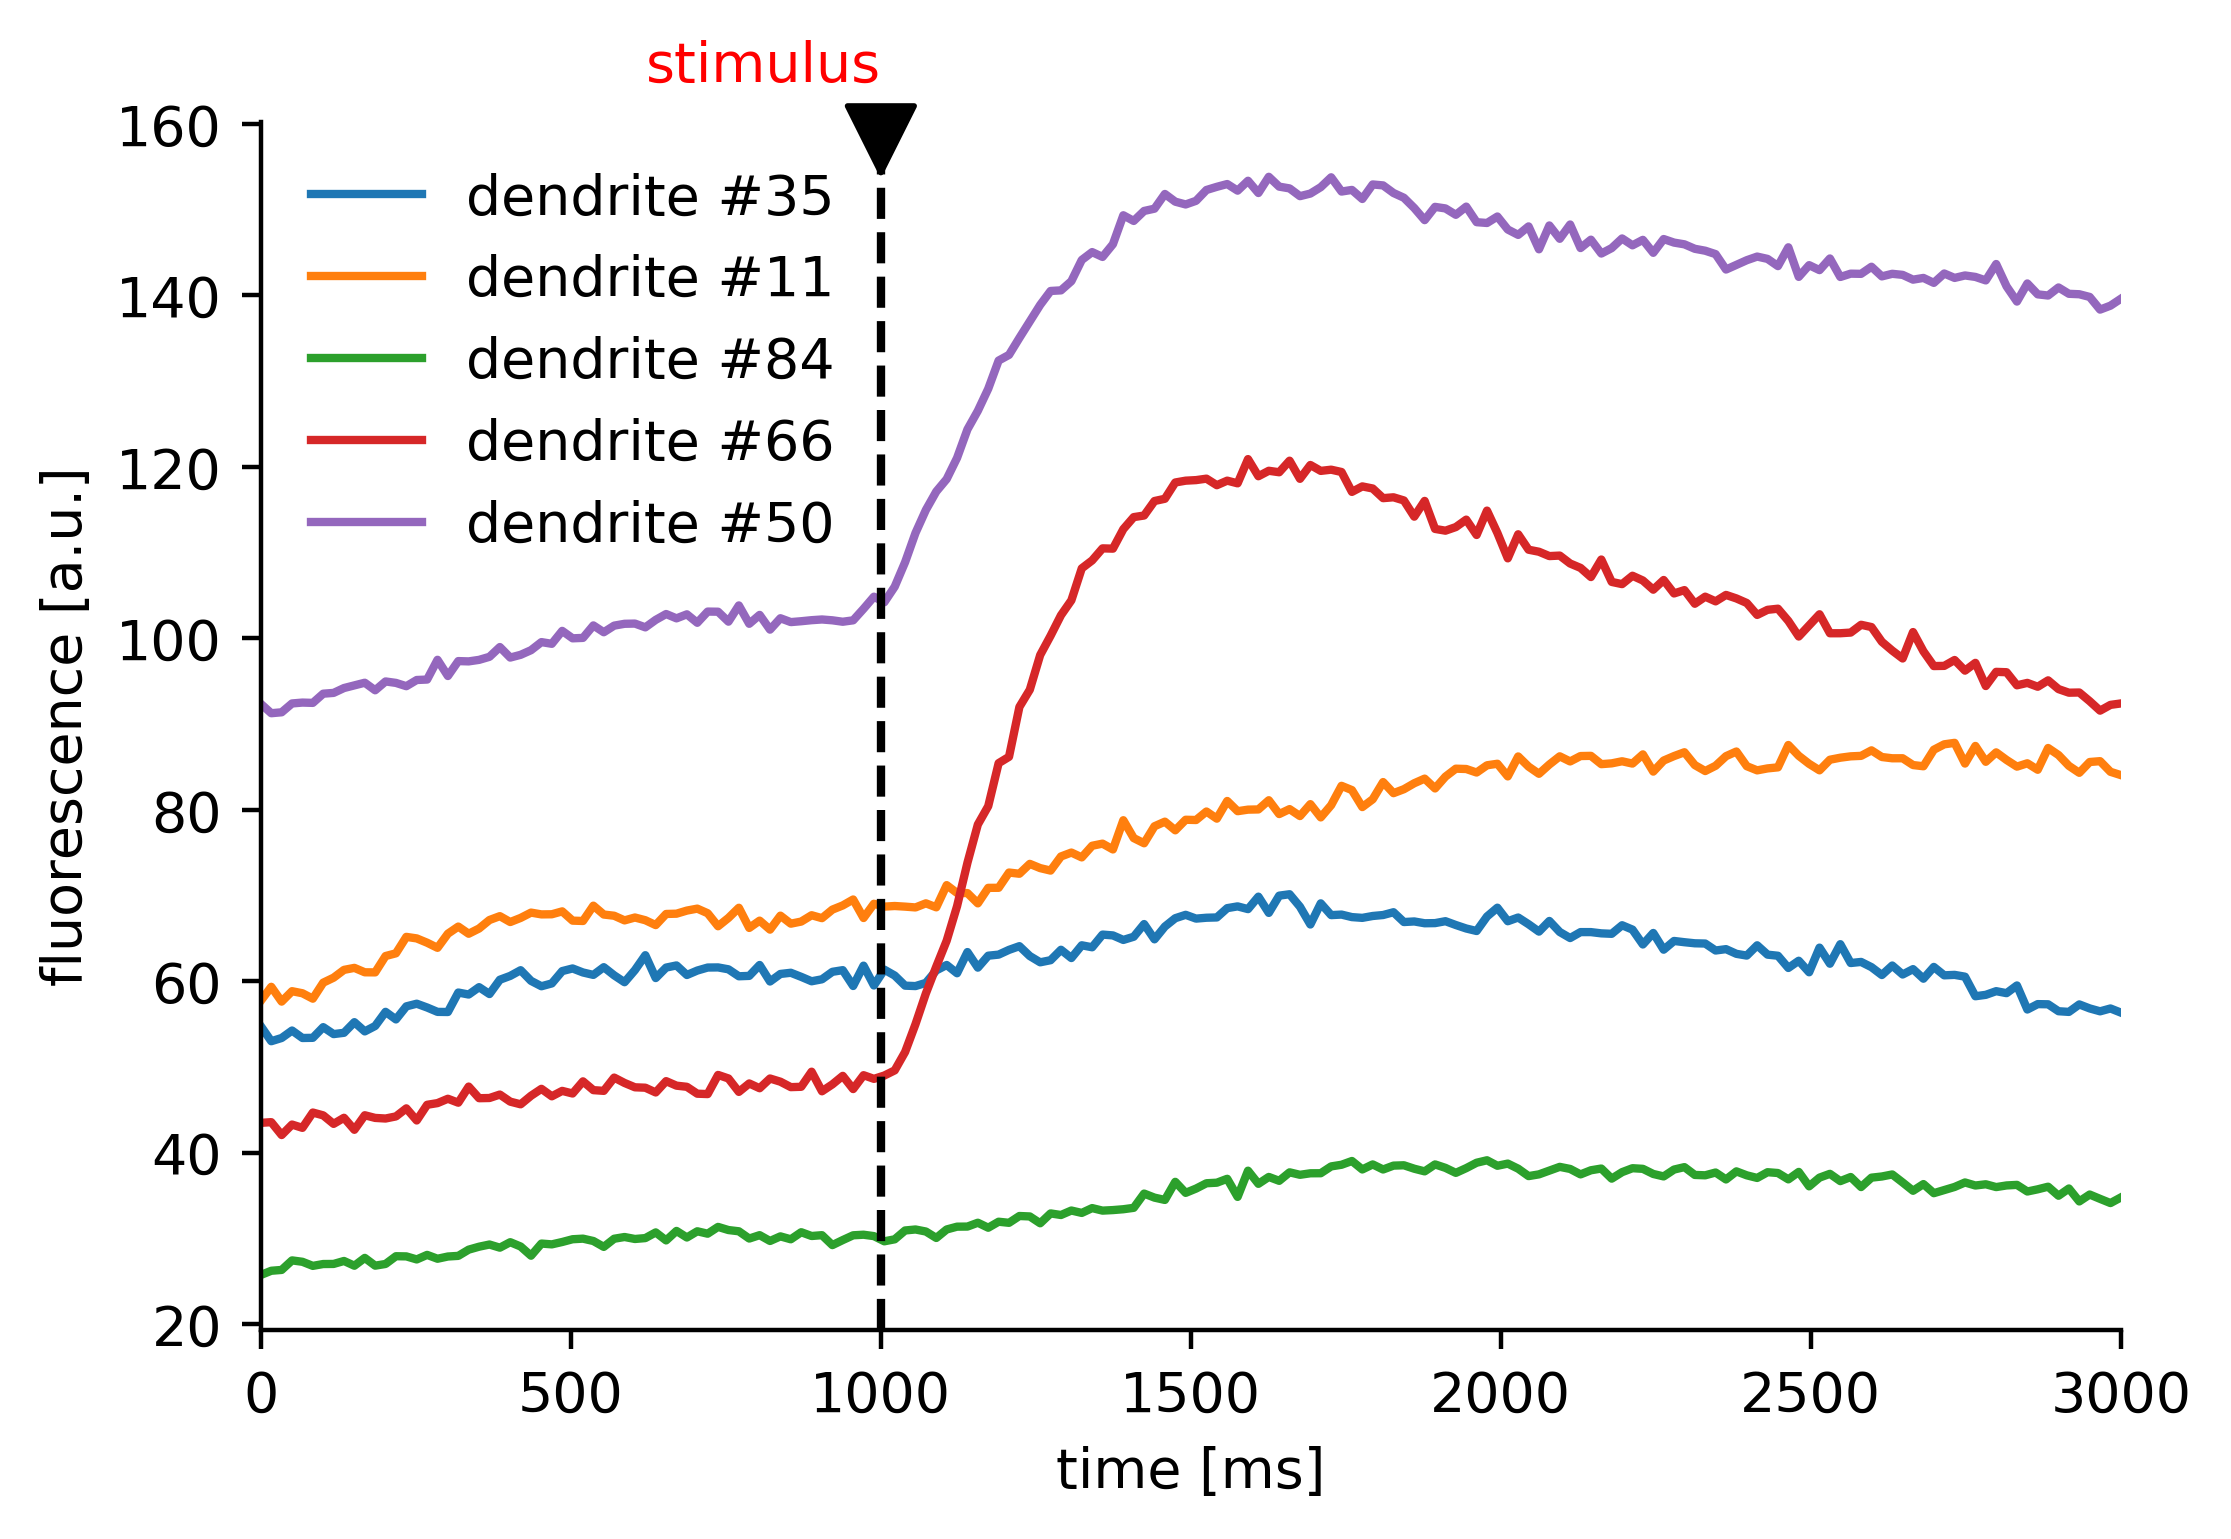

In [295]:
f = h5py.File(filelist[0]+'.hdf5', 'r')

r = np.random.choice(f['data'][:].shape[1], size=len(axarr))
x = np.linspace(0,3000, 180)

g, ax = plt.subplots(1, 1, dpi=400)

maxval = 0
for i, k in enumerate([35, 11, 84, 66, 50]):
    ax.plot(x, np.mean(f['data'][:,k,:], axis=0), label='dendrite #{}'.format(k))
    m = np.max(np.mean(f['data'][:,k,:], axis=0))
    if m > maxval:
        maxval = m

ax.annotate('stimulus',
            xy=(1000, maxval), xycoords='data',
            xytext=(0, 15), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom', color="r")

ax.axvline(1000, linestyle='--', color='black')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xlabel('time [ms]')
ax.set_ylabel('fluorescence [a.u.]')

ax.legend(frameon=False)
#ax.grid()
plt.xlim(0,3000)

g.savefig('traces.png')

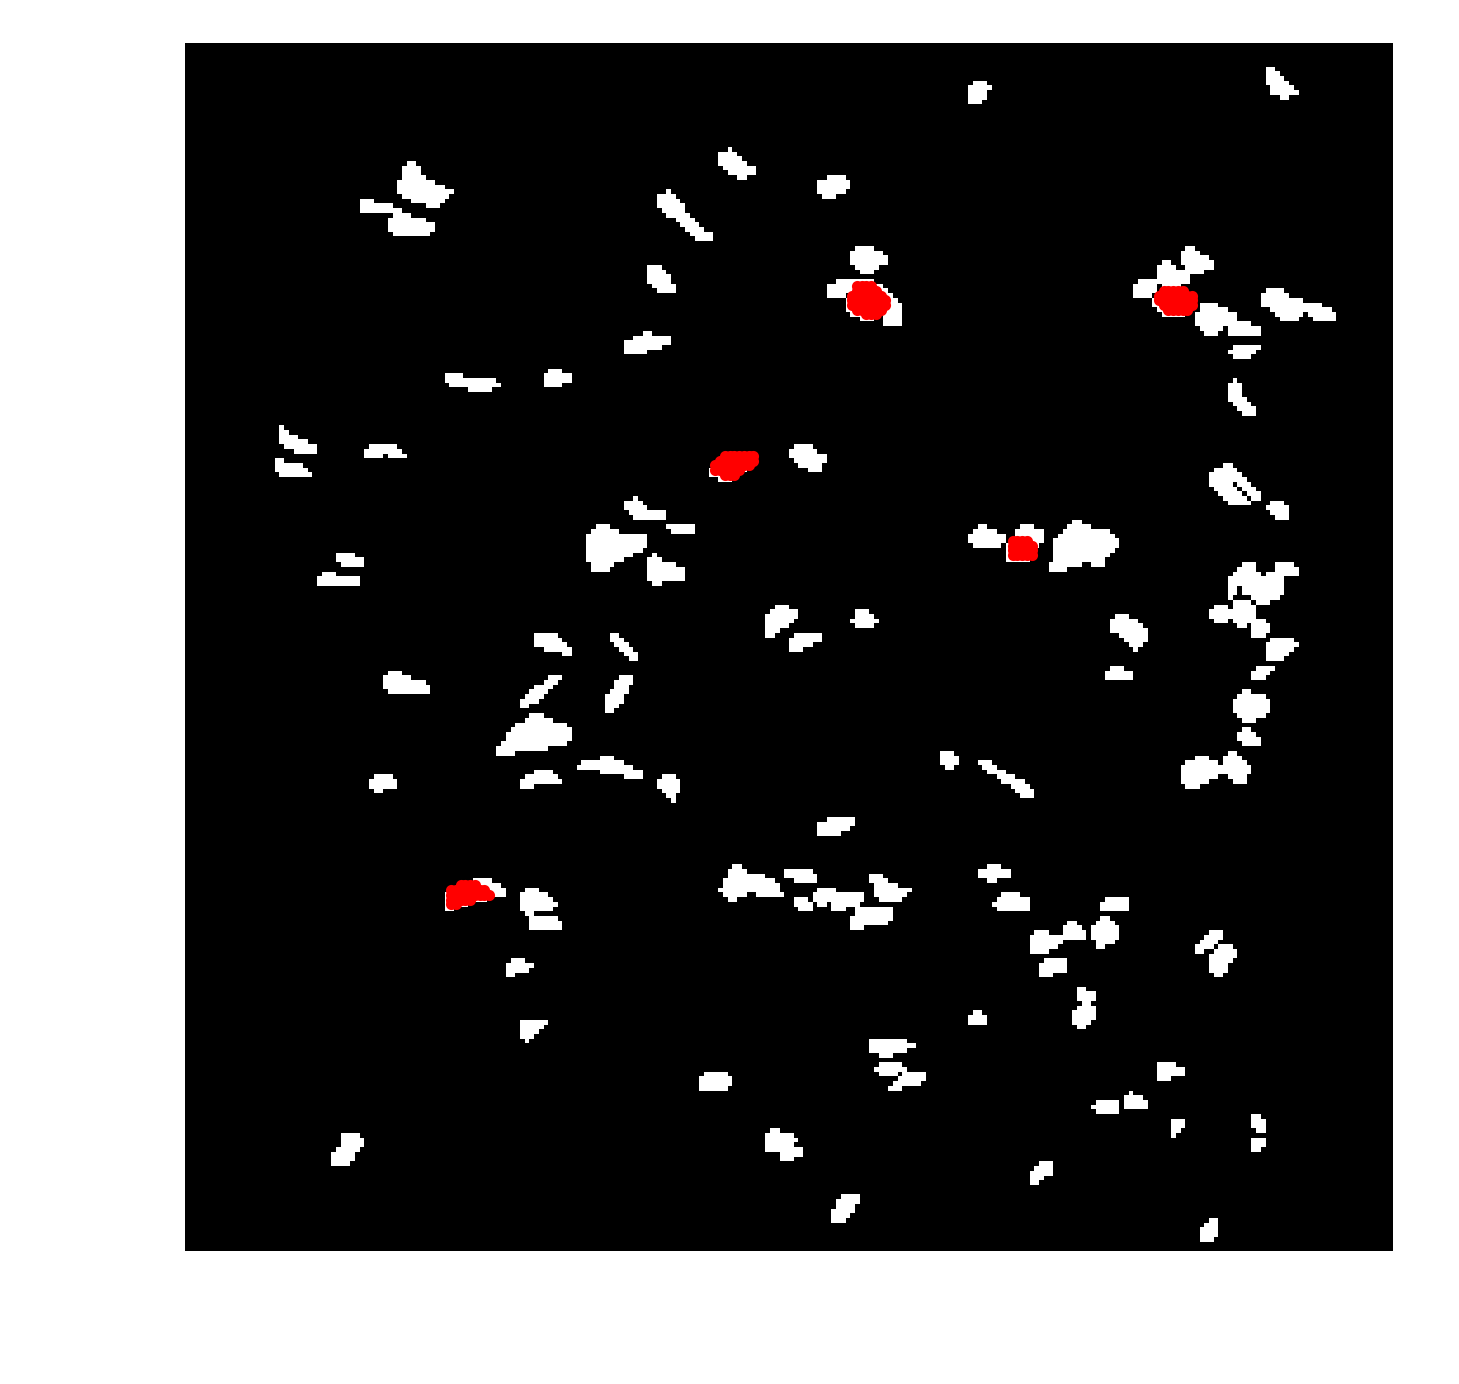

In [294]:
fig = plt.figure(dpi=400)

g = h5py.File(filelist[0][:-6]+"roi.hdf5", "r")

plt.imshow((g['roi'][:]!=0)*1, origin='lower', cmap='gray')
for d in [35, 11, 84, 66, 50]:
    plt.scatter(g['dend'][d,:,1], g['dend'][d,:,0], s=1, color='r')

plt.axis('off')
    
fig.savefig('roi.png')

In [289]:
g['roi'][:]!=0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)